In [1107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from scipy.spatial import distance_matrix
from sklearn.manifold import MDS
#print(repr(d.astype(int)))


!pip install scikit-learn

In [1108]:
# open the sample file used 

file_name = '/mnt/f/year4/senior/FRI26/SP/MS/FRI26_SP-MS_t180.txt'
name  = "FRI26_SP-MS_t180.txt"
timelimit = 10
#file_name = 'F:/year4/senior/FRI26_DN-th0250.txt'

In [1109]:
# open the sample file used 

#file_name = '/mnt/f/year4/senior/GR17/GR17_GA-03.txt'
#file_name = 'FRI26_DN-th0250.txt'

file_path = open(file_name) 
# read the content of the file opened 
content = file_path.readlines() 
def read_tsp_instances_from_file(filename):
    instances=[]
    #print(filename[0])
    first_line = filename[0]
    _, _, num_samples_str = first_line.split()
    global N_samples
    N_samples, num_samples=int(num_samples_str), int(num_samples_str)
    num_points=10
    #print(num_samples_str)

    #GR17 5 21, 24 40
    #FRI26 5 30, 33 60
    start_line = 33
    end_line = 60
    # loop through each N-Sample
    for i, line in enumerate(filename):
        if i in range(start_line-1, end_line):
            #print("line",i)
            line=filename[i].strip()
            try:
                data=list(map(float, line.split()))
                data=list(map(int, data))
            except:
                data=list(map(float, line.split(',')))

            instances.append(data)
    return instances

tsp_instances=read_tsp_instances_from_file(content)

In [1110]:
print(tsp_instances)

[[0, 0, 93, 129, 133, 139, 151, 169, 135, 114, 110, 98, 99, 95, 0, 152, 159, 181, 172, 185, 147, 157, 185, 220, 0, 181], [0, 0, 0, 53, 62, 64, 91, 116, 93, 84, 95, 98, 89, 68, 67, 127, 156, 175, 152, 165, 160, 180, 223, 268, 179, 197], [93, 0, 0, 0, 42, 49, 59, 81, 54, 44, 58, 64, 54, 0, 36, 86, 117, 135, 112, 125, 124, 147, 193, 241, 157, 161], [129, 53, 0, 0, 0, 0, 46, 72, 65, 70, 88, 100, 89, 66, 76, 102, 142, 156, 127, 139, 155, 180, 228, 278, 197, 190], [133, 62, 42, 0, 0, 0, 0, 61, 55, 62, 82, 95, 84, 62, 74, 93, 133, 146, 117, 128, 148, 173, 222, 272, 194, 182], [139, 64, 49, 0, 0, 0, 39, 65, 63, 71, 90, 103, 92, 71, 82, 100, 141, 153, 124, 135, 156, 181, 230, 280, 202, 190], [151, 91, 59, 46, 0, 39, 0, 0, 0, 52, 71, 88, 77, 63, 78, 66, 110, 119, 88, 98, 130, 156, 206, 257, 188, 160], [169, 116, 81, 72, 61, 65, 0, 0, 37, 59, 75, 92, 83, 76, 91, 54, 98, 103, 70, 78, 122, 148, 198, 250, 188, 148], [135, 93, 54, 65, 55, 63, 0, 37, 0, 0, 39, 56, 47, 40, 55, 0, 78, 91, 62, 74, 96, 12

In [1111]:
n_point=len(tsp_instances)
time_step=n_point

print("points = ", n_point)

points =  26


In [1112]:
def read_DN_origin(file_path, n_points):
    start_line = 4
    end_line = start_line + n_points
    delimiter = ','
    with open(file_path, 'r') as file: lines = file.readlines()
    
    distance_matrix=[]
    for i, line in enumerate(lines):
        if i in range(start_line, end_line):
            try:
                row=list(map(float, line.split()))
            except:
                row=list(map(float, line.split(',')))
            distance_matrix.append(row)
    
    return np.array(distance_matrix)

original_dist = read_DN_origin(file_name, len(tsp_instances[0]))

In [1113]:
mds=MDS(n_components=2, dissimilarity='precomputed', normalized_stress='auto', random_state=42)
coordinates=mds.fit_transform(original_dist)
coordinates-=coordinates.min(axis=0)
coordinates/=coordinates.max(axis=0)
df=pd.DataFrame(coordinates, columns=['x', 'y'])
print(len(df))
df

26


,x,y
0,0.357724,1.000000
1,0.093095,0.792767
2,0.157216,0.597834
3,0.014523,0.530926
4,0.030298,0.474642
5,0.000000,0.476828
6,0.076393,0.300627
7,0.107829,0.166909
8,0.198160,0.312979
9,0.249213,0.404370


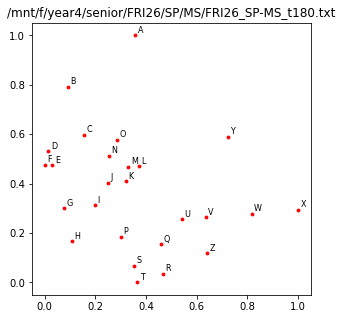

In [1114]:
plt.figure(figsize=(5, 5))

city_index="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
for i in range(len(df)):
    plt.scatter(df.iloc[i]['x'], df.iloc[i]['y'], c='red', s=8)
    if n_point<=26:
        plt.text(df.iloc[i]['x']+0.01, df.iloc[i]['y']+0.01, f'{city_index[i]}', fontsize=8)
    else:
        plt.text(df.iloc[i]['x']+0.01, df.iloc[i]['y']+0.01, f'{i}')

plt.title(file_name)
plt.show()

!pip install --upgrade --user ortools

In [1115]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


def create_data_model(matrix):
    """Stores the data for the problem."""
    data = {}
    data["distance_matrix"]=matrix
    data["num_vehicles"] = 1
    data["depot"] = 0
#    print("infunction\n" + data["distance_matrix"])
    return data



In [1116]:
def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print(f"Objective: {solution.ObjectiveValue()} miles")
    index = routing.Start(0)
    plan_output = "Route for vehicle 0:\n"
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += f" {manager.IndexToNode(index)} ->"
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += f" {manager.IndexToNode(index)}\n"
    print(plan_output)
    plan_output += f"Route distance: {route_distance}miles\n"
    return solution.ObjectiveValue()


In [1117]:
def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data["distance_matrix"][from_node][to_node]

#transit_callback_index = routing.RegisterTransitCallback(distance_callback)

In [1118]:
def get_routes(solution, routing, manager):
  """Get vehicle routes from a solution and store them in an array."""
  # Get vehicle routes and store them in a two dimensional array whose
  # i,j entry is the jth location visited by vehicle i along its route.
  routes = []
  for route_nbr in range(routing.vehicles()):
    index = routing.Start(route_nbr)
    route = [manager.IndexToNode(index)]
    while not routing.IsEnd(index):
      index = solution.Value(routing.NextVar(index))
      route.append(manager.IndexToNode(index))
    routes.append(route)
  return routes

In [1119]:

"""Entry point of the program."""
# Instantiate the data problem.
data = create_data_model(tsp_instances)

# Create the routing index manager.
manager = pywrapcp.RoutingIndexManager(
    len(data["distance_matrix"]), data["num_vehicles"], data["depot"]
)

# Create Routing Model.
routing = pywrapcp.RoutingModel(manager)


def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data["distance_matrix"][from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)

# Define cost of each arc.
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# Setting first solution heuristic.
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
    routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
)
search_parameters.time_limit.seconds = 10
start = time.time()
# Solve the problem.
solution = routing.SolveWithParameters(search_parameters)
end = time.time()
# Print solution on console.
if solution:
    print_solution(manager, routing, solution)
        
routes = get_routes(solution, routing, manager)
# Display the routes.
cost = solution.ObjectiveValue()
for i, route in enumerate(routes):
    print('Route', i, route)
print("The time of execution of above program is :", (end-start) * 10**3, "ms")

Objective: 178 miles
Route for vehicle 0:
 0 -> 24 -> 23 -> 22 -> 21 -> 25 -> 17 -> 19 -> 18 -> 16 -> 20 -> 11 -> 14 -> 13 -> 12 -> 10 -> 9 -> 8 -> 15 -> 7 -> 6 -> 4 -> 5 -> 3 -> 2 -> 1 -> 0

Route 0 [0, 24, 23, 22, 21, 25, 17, 19, 18, 16, 20, 11, 14, 13, 12, 10, 9, 8, 15, 7, 6, 4, 5, 3, 2, 1, 0]
The time of execution of above program is : 6.066799163818359 ms


In [1120]:
routes[0]

[0,
 24,
 23,
 22,
 21,
 25,
 17,
 19,
 18,
 16,
 20,
 11,
 14,
 13,
 12,
 10,
 9,
 8,
 15,
 7,
 6,
 4,
 5,
 3,
 2,
 1,
 0]

In [1121]:
cost

178

In [1122]:
def list_duplicates(seq):
  seen = set()
  seen_add = seen.add
  # adds all elements it doesn't know yet to seen and all other to seen_twice
  seen_twice = set( x for x in seq if x in seen or seen_add(x) )
  # turn the set into a list (as requested)
  return list( seen_twice )

In [1123]:
print(list_duplicates(routes[0]))
print(len(routes[0]))

[0]
27


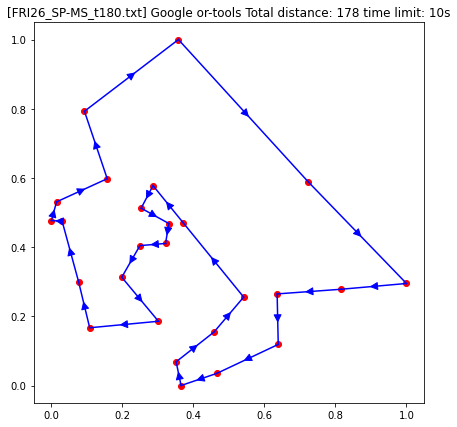

In [1124]:
plt.figure(figsize=(7, 7))
#routes = [0, 3, 12, 6, 7, 5, 16, 13, 14, 2, 10, 9, 1, 4, 8, 11, 15, 0]
#cost = 2085
for i in range(len(tsp_instances[0])):
    plt.scatter(df.iloc[i]['x'], df.iloc[i]['y'], c='red')
    #plt.text(df.iloc[i]['x']+0.88, df.iloc[i]['y']+0.88, f'{i}')

for i in range(len(routes[0])-1):
    #plt.arrow(df.iloc[routes[i]]['x'], df.iloc[routes[i]]['y'], df.iloc[routes[i+1]]['x'] - df.iloc[routes[i]]['x'], df.iloc[routes[i+1]]['y'] - df.iloc[routes[i]]['y'], head_width=2, head_length=3, fc='blue', ec='blue')
    x1, y1=df.iloc[routes[0][i]]['x'], df.iloc[routes[0][i]]['y']
    x2, y2=df.iloc[routes[0][i+1]]['x'], df.iloc[routes[0][i+1]]['y']
    plt.plot([x1, x2], [y1, y2], c='blue')

    mid_x=(x1+x2)/2
    mid_y=(y1+y2)/2
    dx=(x2-x1)*0.05  # Offset along x-direction
    dy=(y2-y1)*0.05  # Offset along y-direction
    
    #plt.annotate('', xy=(mid_x + dx, mid_y + dy), xytext=(mid_x, mid_y), arrowprops=dict(arrowstyle='->', color='blue'))
    plt.annotate('', xy=(mid_x + dx, mid_y + dy), xytext=(mid_x, mid_y),
                 arrowprops=dict(arrowstyle='simple, tail_width=0.5, head_width=0.69, head_length=0.69', color='blue'))
        
    try: 
        plt.title(f"[{name}] Google or-tools Total distance: {cost} time limit: {timelimit}s")
    except:
        plt.title(f"LeapHybrid Total distance: {cost}")
plt.show()